<a href="https://colab.research.google.com/github/youssef893/Variance-AutoEncoder/blob/main/VAE_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Youssef Sayed Ahmed 20180342

Omar Mostafa 20180182

Method 1: x_decoded = decoder.predict(z_zz[2]+Val1)   try different values for Val1 and figure-out the effect

In [1]:
import keras
from keras import layers
import numpy as np

In [2]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 10



In [3]:
inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)

z_log_sigma = layers.Dense(latent_dim)(h)
print(z_mean.shape)



(None, 10)


In [4]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])



In [5]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')
encoder.summary()



Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           50240       ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 10)           650         ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 10)           650         ['dense[0][0]']                  
                                                                                            

In [6]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

vae.compile(optimizer='adam')



In [7]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))




In [8]:
vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32)
        #validation_data=(x_test, x_test))

x_decoded = vae.predict(x_train)



Epoch 1/100
1875/1875 [==============================] - 16s 7ms/step - loss: 145.2576
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 116.1728
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 110.5544
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 107.4219
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 105.3010
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 103.8009
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/step - loss: 102.6613
Epoch 8/100
1875/1875 [==============================] - 8s 4ms/step - loss: 101.8653
Epoch 9/100
1875/1875 [==============================] - 8s 4ms/step - loss: 101.2299
Epoch 10/100
1875/1875 [==============================] - 8s 4ms/step - loss: 100.7409
Epoch 11/100
1875/1875 [==============================] - 8s 4ms/step - loss: 100.3532
Epoch 12/100
1875/1875 [===========================

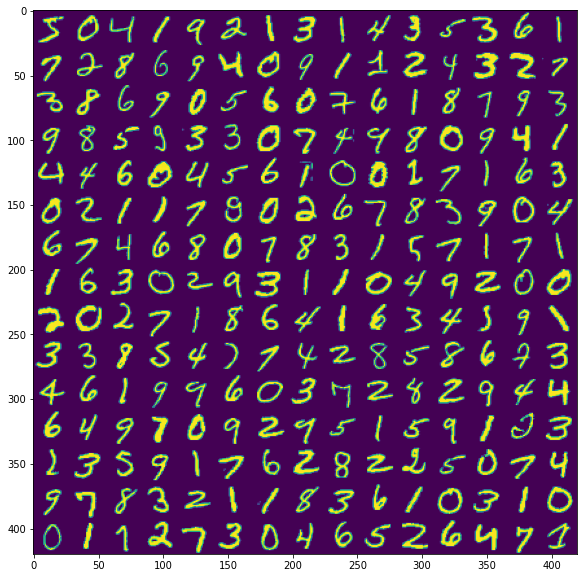

In [9]:
import matplotlib.pyplot as plt
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        digit = x_train[k].reshape(digit_size, digit_size)
        k = k +1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()



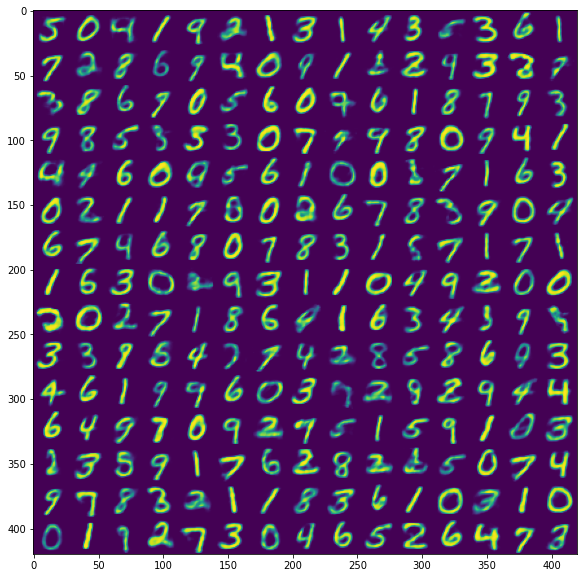

In [10]:
import matplotlib.pyplot as plt
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        digit = x_decoded[k].reshape(digit_size, digit_size)
        k = k +1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()



In [11]:
z_zz = encoder.predict(x_train)
print (z_zz[2].shape)
print (z_zz[2][0].shape)

x_decoded = decoder.predict(z_zz[2]+0.3)
#x_decoded = decoder.predict(z_zz[0]+z_zz[1] * 0.4)



(60000, 10)
(10,)


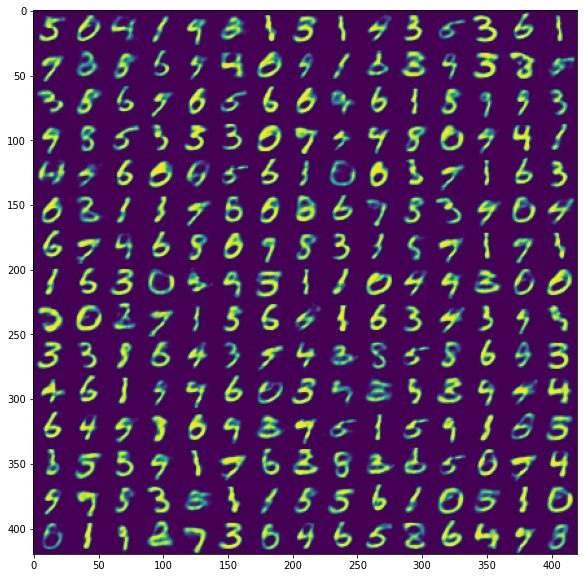

In [12]:
import matplotlib.pyplot as plt

# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        #z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        
        digit = x_decoded[k].reshape(digit_size, digit_size)
        k=k+1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

================================================================================
Method 2: x_decoded = decoder.predict(z_zz[0]+z_zz[1] * Val2)   
 try different values for Val2 and figure-out the effect
================================================================================

In [13]:
import keras
from keras import layers
import numpy as np

In [14]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 10



In [15]:
inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)

z_log_sigma = layers.Dense(latent_dim)(h)
print(z_mean.shape)



(None, 10)


In [16]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])



In [17]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')
encoder.summary()



Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 64)           50240       ['input_2[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 10)           650         ['dense_5[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 10)           650         ['dense_5[0][0]']                
                                                                                            

In [18]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

vae.compile(optimizer='adam')



In [19]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))




In [20]:
vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32)
        #validation_data=(x_test, x_test))

x_decoded = vae.predict(x_train)



Epoch 1/100
1875/1875 [==============================] - 9s 4ms/step - loss: 147.0468
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 116.6217
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 110.1241
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 106.4533
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 104.2922
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 102.8364
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/step - loss: 101.7962
Epoch 8/100
1875/1875 [==============================] - 8s 4ms/step - loss: 100.9773
Epoch 9/100
1875/1875 [==============================] - 8s 4ms/step - loss: 100.3337
Epoch 10/100
1875/1875 [==============================] - 8s 4ms/step - loss: 99.8026
Epoch 11/100
1875/1875 [==============================] - 8s 4ms/step - loss: 99.3918
Epoch 12/100
1875/1875 [==============================

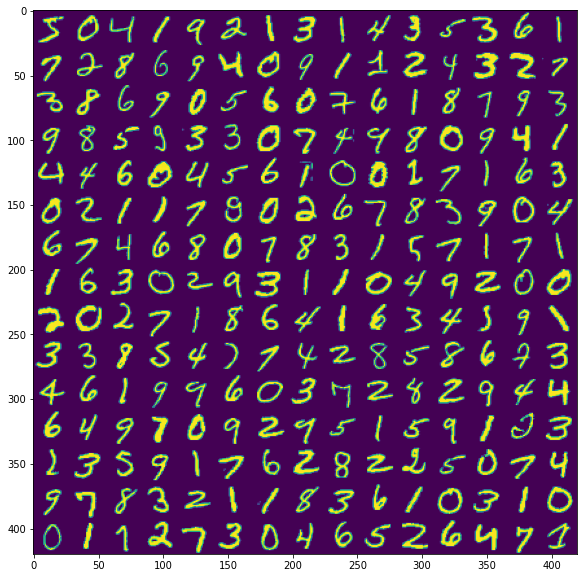

In [21]:
import matplotlib.pyplot as plt
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        digit = x_train[k].reshape(digit_size, digit_size)
        k = k +1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()



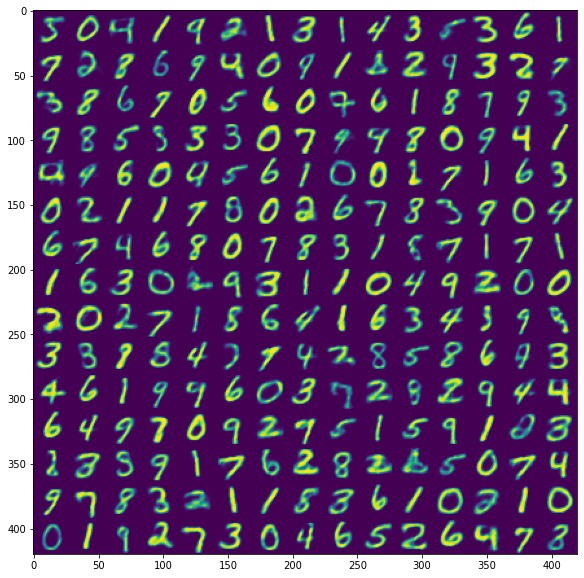

In [22]:
import matplotlib.pyplot as plt
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        digit = x_decoded[k].reshape(digit_size, digit_size)
        k = k +1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()



In [23]:
z_zz = encoder.predict(x_train)
print (z_zz[2].shape)
print (z_zz[2][0].shape)

#x_decoded = decoder.predict(z_zz[2]+0.01)
x_decoded = decoder.predict(z_zz[0]+z_zz[1] * 0.9)



(60000, 10)
(10,)


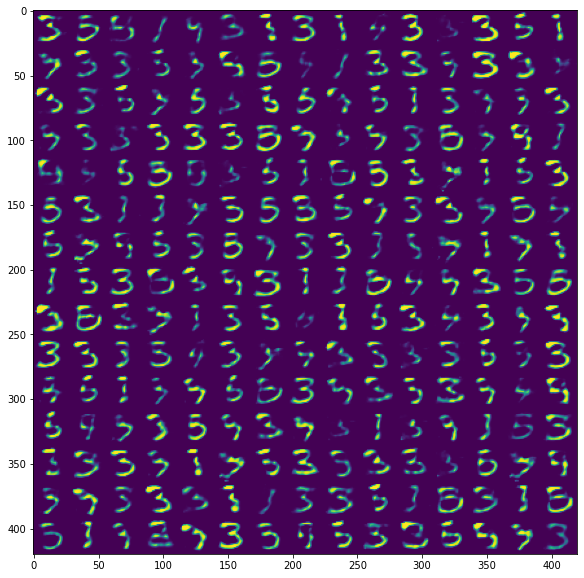

In [24]:
import matplotlib.pyplot as plt

# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        #z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        
        digit = x_decoded[k].reshape(digit_size, digit_size)
        k=k+1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

A deeper network is required. The encoder and decoder should include more layers

In [25]:
import keras
from keras import layers
import numpy as np

In [26]:
original_dim = 28 * 28
intermediate_dim = 64
hidden_dim_1 = 32
hidden_dim_2 = 16
latent_dim = 10



In [27]:
inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
h = layers.Dense(hidden_dim_1, activation='relu')(h)
h = layers.Dense(hidden_dim_2, activation='relu')(h)
z_mean = layers.Dense(latent_dim)(h)

z_log_sigma = layers.Dense(latent_dim)(h)
print(z_mean.shape)



(None, 10)


In [28]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])



In [29]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(hidden_dim_2, activation='relu')(latent_inputs)
x = layers.Dense(hidden_dim_1, activation='relu')(latent_inputs)
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')
encoder.summary()



Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 64)           50240       ['input_3[0][0]']                
                                                                                                  
 dense_11 (Dense)               (None, 32)           2080        ['dense_10[0][0]']               
                                                                                                  
 dense_12 (Dense)               (None, 16)           528         ['dense_11[0][0]']               
                                                                                            

In [30]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

vae.compile(optimizer='adam')



In [31]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))




In [32]:
vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32)
        #validation_data=(x_test, x_test))

x_decoded = vae.predict(x_train)



Epoch 1/100
1875/1875 [==============================] - 10s 5ms/step - loss: 155.5108
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 119.3332
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 111.7432
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 107.1044
Epoch 5/100
1875/1875 [==============================] - 9s 5ms/step - loss: 104.5363
Epoch 6/100
1875/1875 [==============================] - 9s 5ms/step - loss: 102.9798
Epoch 7/100
1875/1875 [==============================] - 9s 5ms/step - loss: 101.8919
Epoch 8/100
1875/1875 [==============================] - 9s 5ms/step - loss: 101.0762
Epoch 9/100
1875/1875 [==============================] - 9s 5ms/step - loss: 100.4169
Epoch 10/100
1875/1875 [==============================] - 9s 5ms/step - loss: 99.8673
Epoch 11/100
1875/1875 [==============================] - 9s 5ms/step - loss: 99.4962
Epoch 12/100
1875/1875 [=============================

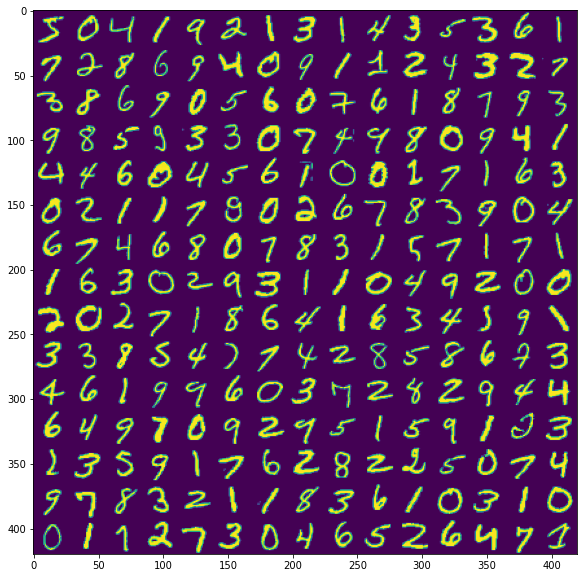

In [33]:
import matplotlib.pyplot as plt
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        digit = x_train[k].reshape(digit_size, digit_size)
        k = k +1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()



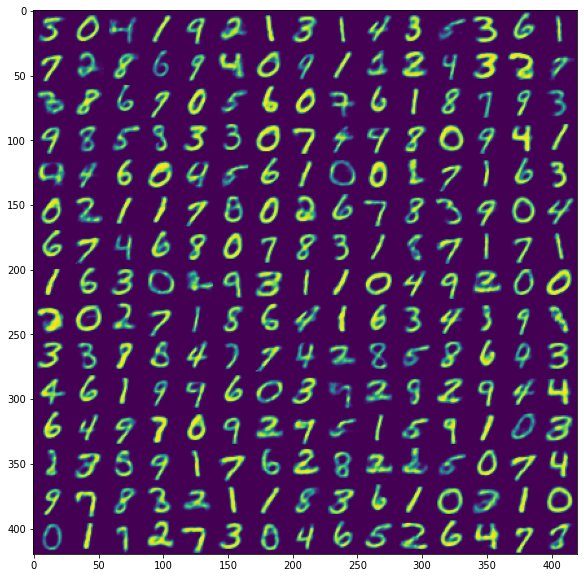

In [34]:
import matplotlib.pyplot as plt
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        digit = x_decoded[k].reshape(digit_size, digit_size)
        k = k +1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()



In [35]:
z_zz = encoder.predict(x_train)
print (z_zz[2].shape)
print (z_zz[2][0].shape)

#x_decoded = decoder.predict(z_zz[2]+0.01)
x_decoded = decoder.predict(z_zz[0]+z_zz[1] * 0.4)



(60000, 10)
(10,)


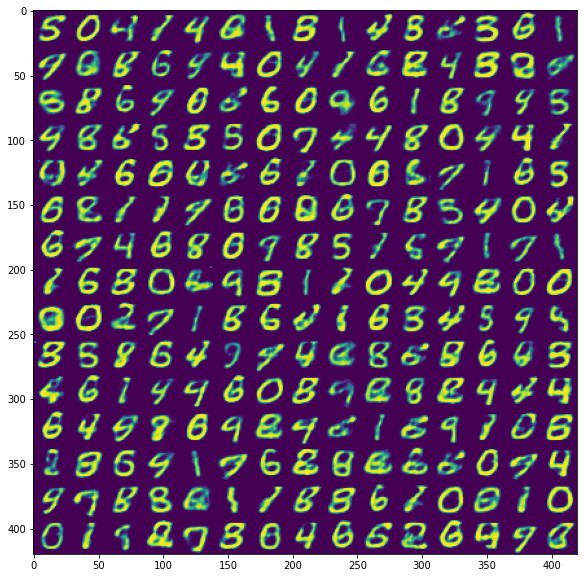

In [36]:
import matplotlib.pyplot as plt

# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        #z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        
        digit = x_decoded[k].reshape(digit_size, digit_size)
        k=k+1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

Try different latent dimensions and figure-out the effect.

In [37]:
import keras
from keras import layers
import numpy as np

In [38]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 15



In [39]:
inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)

z_log_sigma = layers.Dense(latent_dim)(h)
print(z_mean.shape)



(None, 15)


In [40]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])



In [41]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')
encoder.summary()



Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_19 (Dense)               (None, 64)           50240       ['input_4[0][0]']                
                                                                                                  
 dense_20 (Dense)               (None, 15)           975         ['dense_19[0][0]']               
                                                                                                  
 dense_21 (Dense)               (None, 15)           975         ['dense_19[0][0]']               
                                                                                            

In [42]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

vae.compile(optimizer='adam')



In [43]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))




In [44]:
vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32)
        #validation_data=(x_test, x_test))

x_decoded = vae.predict(x_train)



Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 142.7327
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 106.5335
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 100.9831
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 98.0134
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 95.9942
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 94.5786
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/step - loss: 93.5825
Epoch 8/100
1875/1875 [==============================] - 8s 4ms/step - loss: 92.7872
Epoch 9/100
1875/1875 [==============================] - 8s 4ms/step - loss: 92.1585
Epoch 10/100
1875/1875 [==============================] - 8s 4ms/step - loss: 91.6244
Epoch 11/100
1875/1875 [==============================] - 8s 4ms/step - loss: 91.1850
Epoch 12/100
1875/1875 [==============================] - 8s

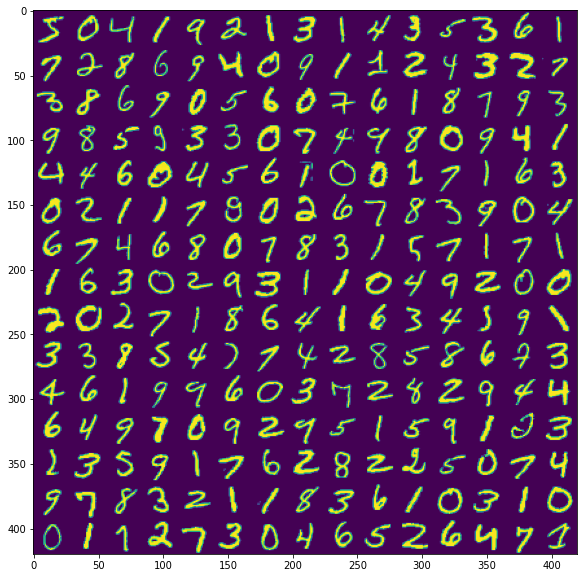

In [45]:
import matplotlib.pyplot as plt
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        digit = x_train[k].reshape(digit_size, digit_size)
        k = k +1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()



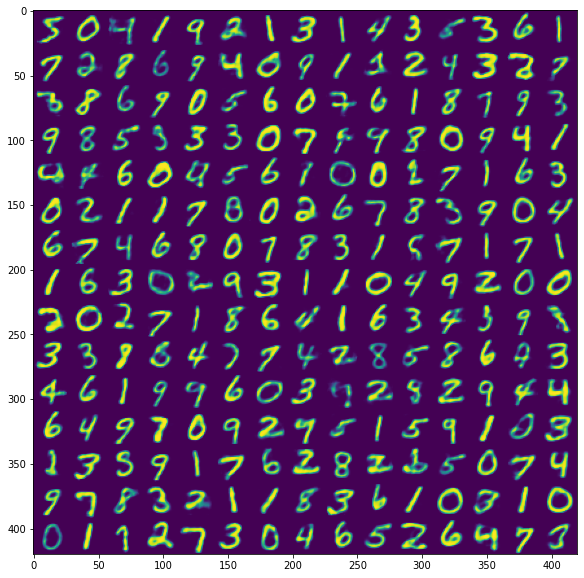

In [46]:
import matplotlib.pyplot as plt
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        digit = x_decoded[k].reshape(digit_size, digit_size)
        k = k +1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()



In [47]:
z_zz = encoder.predict(x_train)
print (z_zz[2].shape)
print (z_zz[2][0].shape)

#x_decoded = decoder.predict(z_zz[2]+0.01)
x_decoded = decoder.predict(z_zz[0]+z_zz[1] * 0.4)



(60000, 15)
(15,)


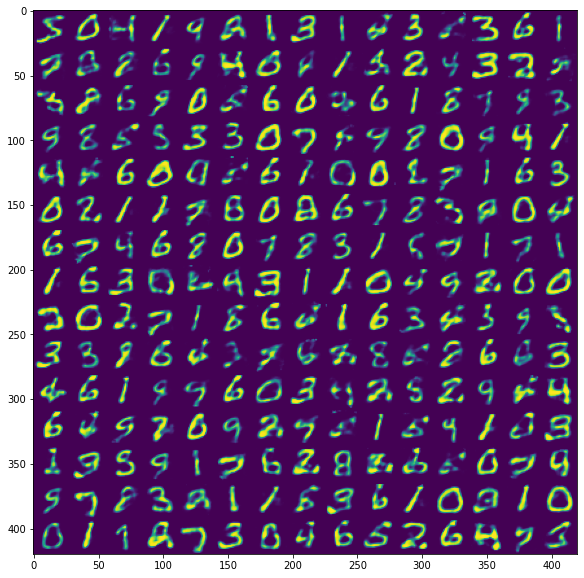

In [48]:
import matplotlib.pyplot as plt

# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        #z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        
        digit = x_decoded[k].reshape(digit_size, digit_size)
        k=k+1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

Deeper model with method 2


In [49]:
import keras
from keras import layers
import numpy as np

In [50]:
original_dim = 28 * 28
intermediate_dim = 64
hidden_dim_1 = 32
hidden_dim_2 = 16
latent_dim = 10



In [51]:
inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
h = layers.Dense(hidden_dim_1, activation='relu')(h)
h = layers.Dense(hidden_dim_2, activation='relu')(h)
z_mean = layers.Dense(latent_dim)(h)

z_log_sigma = layers.Dense(latent_dim)(h)
print(z_mean.shape)



(None, 10)


In [52]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])



In [53]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(hidden_dim_2, activation='relu')(latent_inputs)
x = layers.Dense(hidden_dim_1, activation='relu')(latent_inputs)
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')
encoder.summary()



Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_24 (Dense)               (None, 64)           50240       ['input_5[0][0]']                
                                                                                                  
 dense_25 (Dense)               (None, 32)           2080        ['dense_24[0][0]']               
                                                                                                  
 dense_26 (Dense)               (None, 16)           528         ['dense_25[0][0]']               
                                                                                            

In [54]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

vae.compile(optimizer='adam')



In [55]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))




In [56]:
vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32)
        #validation_data=(x_test, x_test))

x_decoded = vae.predict(x_train)



Epoch 1/100
1875/1875 [==============================] - 11s 6ms/step - loss: 158.6460
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 121.5773
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 115.3491
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 110.8022
Epoch 5/100
1875/1875 [==============================] - 9s 5ms/step - loss: 107.5478
Epoch 6/100
1875/1875 [==============================] - 9s 5ms/step - loss: 105.8322
Epoch 7/100
1875/1875 [==============================] - 9s 5ms/step - loss: 104.7480
Epoch 8/100
1875/1875 [==============================] - 9s 5ms/step - loss: 103.8909
Epoch 9/100
1875/1875 [==============================] - 9s 5ms/step - loss: 103.2260
Epoch 10/100
1875/1875 [==============================] - 9s 5ms/step - loss: 102.6471
Epoch 11/100
1875/1875 [==============================] - 9s 5ms/step - loss: 101.9222
Epoch 12/100
1875/1875 [===========================

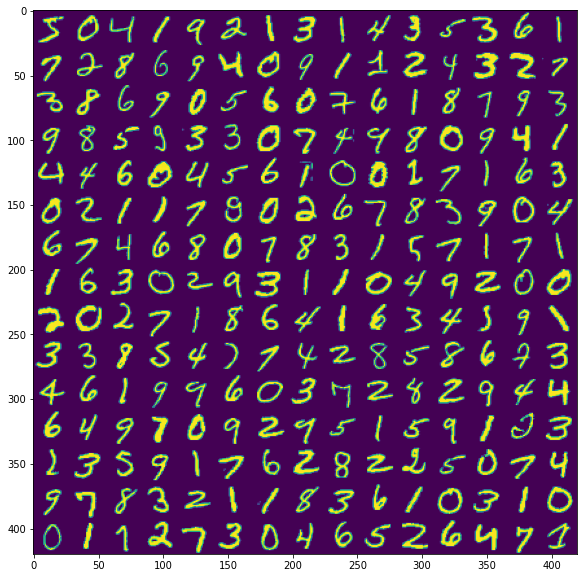

In [57]:
import matplotlib.pyplot as plt
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        digit = x_train[k].reshape(digit_size, digit_size)
        k = k +1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()



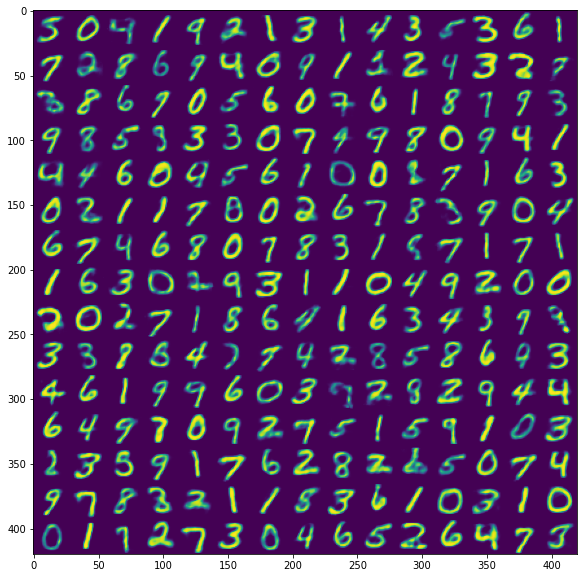

In [58]:
import matplotlib.pyplot as plt
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        digit = x_decoded[k].reshape(digit_size, digit_size)
        k = k +1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()



In [59]:
z_zz = encoder.predict(x_train)
print (z_zz[2].shape)
print (z_zz[2][0].shape)

#x_decoded = decoder.predict(z_zz[2]+0.01)
x_decoded = decoder.predict(z_zz[0]+z_zz[1] * 0.1)



(60000, 10)
(10,)


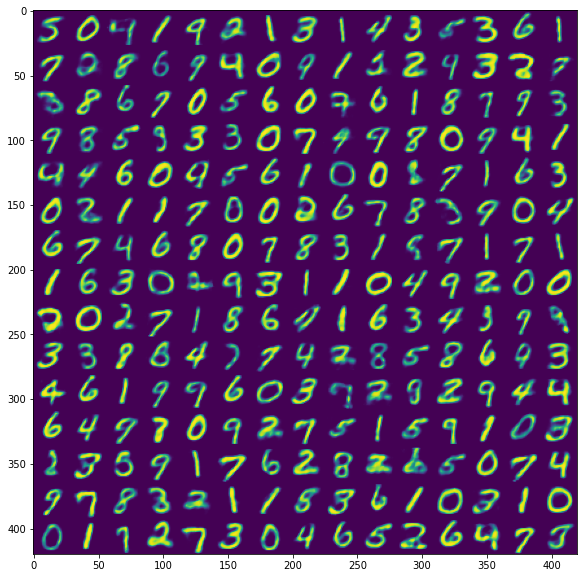

In [60]:
import matplotlib.pyplot as plt

# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        #z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        
        digit = x_decoded[k].reshape(digit_size, digit_size)
        k=k+1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()